# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 3 of Set 1 | escarcega
Processing Record 4 of Set 1 | ocean city
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | kasane
Processing Record 7 of Set 1 | kayangel
Processing Record 8 of Set 1 | nouadhibou
Processing Record 9 of Set 1 | dryden
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | igarka
Processing Record 12 of Set 1 | general cabrera
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | bodden town
Processing Record 15 of Set 1 | natal
Processing Record 16 of Set 1 | klyuchi
Processing Record 17 of Set 1 | ensenada
Processing Record 18 of Set 1 | keflavik
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | cannonvale
Processing Record 21 of Set 1 | chonchi
Processing Record 22 of Set 1 | hermanus
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          203
Lat           203
Lng           203
Max Temp      203
Humidity      203
Cloudiness    203
Wind Speed    203
Country       203
Date          203
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fort saskatchewan,53.7168,-113.2187,0.43,83,93,3.60,CA,1731283879
1,ayancik,41.9447,34.5861,12.90,68,100,1.56,TR,1731283880
2,port-aux-francais,-49.3500,70.2167,4.27,88,63,11.09,TF,1731283881
3,port mathurin,-19.6833,63.4167,24.02,80,94,9.35,MU,1731283882
4,yellowknife,62.4560,-114.3525,-15.77,95,23,2.92,CA,1731283883


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort saskatchewan,53.7168,-113.2187,0.43,83,93,3.60,CA,1731283879
1,ayancik,41.9447,34.5861,12.90,68,100,1.56,TR,1731283880
2,port-aux-francais,-49.3500,70.2167,4.27,88,63,11.09,TF,1731283881
3,port mathurin,-19.6833,63.4167,24.02,80,94,9.35,MU,1731283882
4,yellowknife,62.4560,-114.3525,-15.77,95,23,2.92,CA,1731283883


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

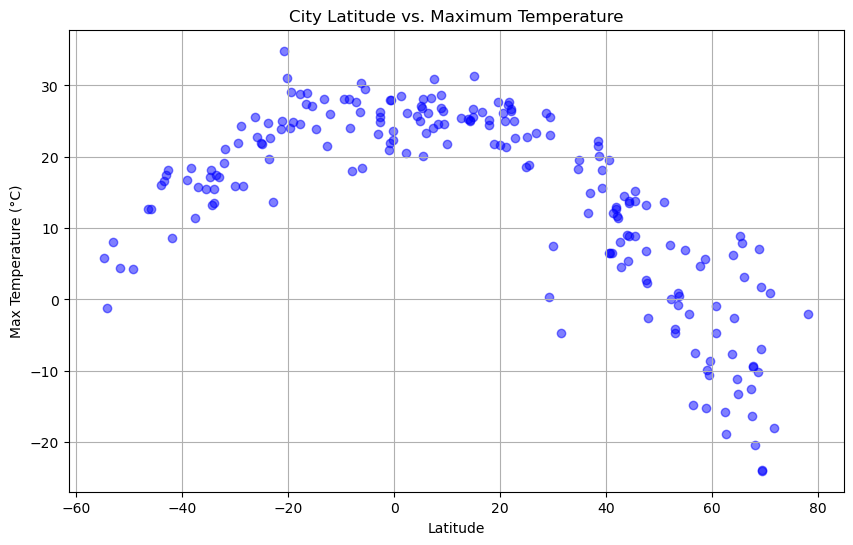

In [13]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', alpha=0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

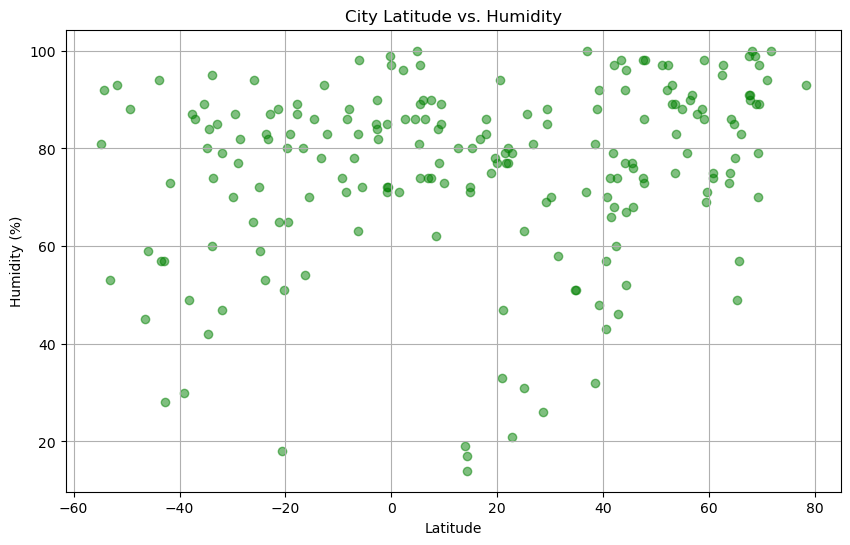

In [14]:
# Build the scatter plot for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='green', alpha=0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

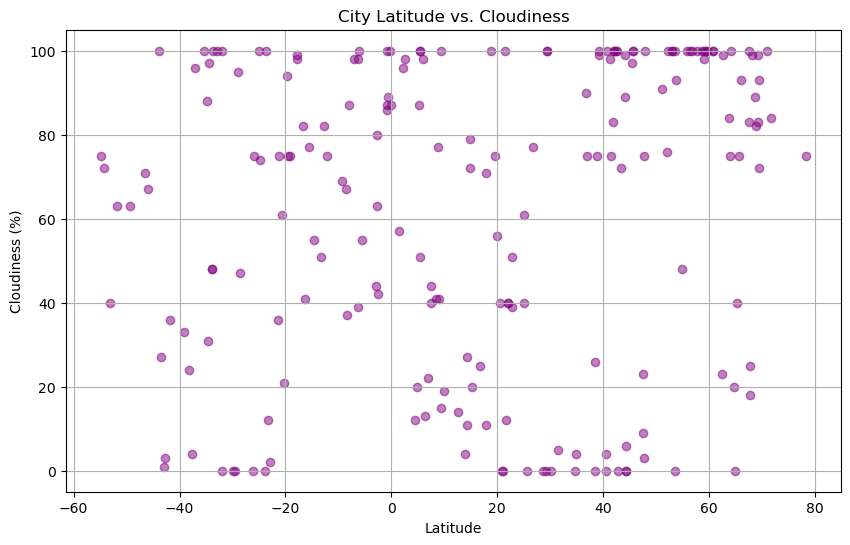

In [15]:
# Build the scatter plot for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='purple', alpha=0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

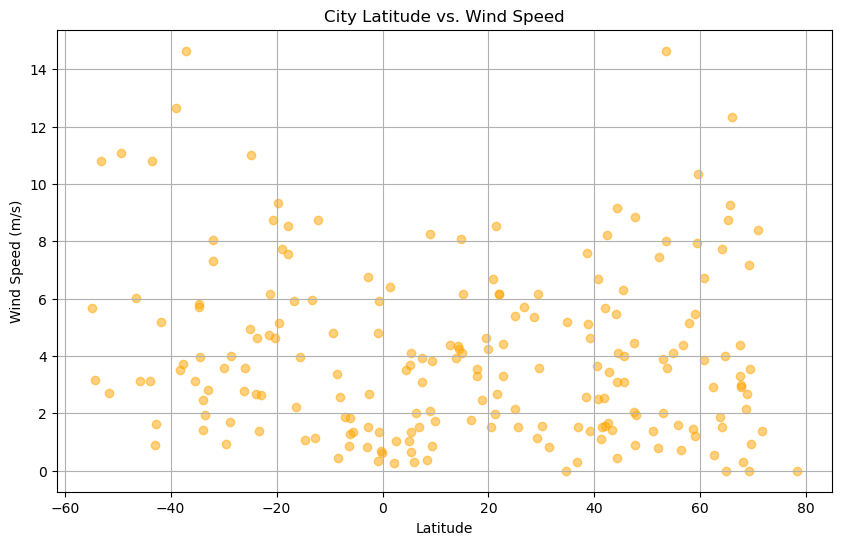

In [16]:
# Build the scatter plot for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='orange', alpha=0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, xlabel, ylabel, title, output_file):
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Create the regression line
    regression_line = slope * x + intercept

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.plot(x, regression_line, color='red', linewidth=2)

    # Incorporate graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    
    # Show the linear regression equation and R-squared value
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}', 
                 xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle='round', alpha=0.1))

    # Save the figure
    plt.savefig(output_file)

    # Show the plot
    plt.show()


In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort saskatchewan,53.7168,-113.2187,0.43,83,93,3.60,CA,1731283879
1,ayancik,41.9447,34.5861,12.90,68,100,1.56,TR,1731283880
4,yellowknife,62.4560,-114.3525,-15.77,95,23,2.92,CA,1731283883
5,bethel,41.3712,-73.4140,12.19,66,75,1.54,US,1731283885
9,bilibino,68.0546,166.4372,-20.40,100,99,0.30,RU,1731283889


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,4.27,88,63,11.09,TF,1731283881
3,port mathurin,-19.6833,63.4167,24.02,80,94,9.35,MU,1731283882
6,uturoa,-16.7333,-151.4333,27.41,80,82,5.91,PF,1731283886
7,adamstown,-25.0660,-130.1015,21.93,72,100,4.96,PN,1731283887
8,formosa,-26.1775,-58.1781,25.54,65,0,2.77,AR,1731283888


###  Temperature vs. Latitude Linear Regression Plot

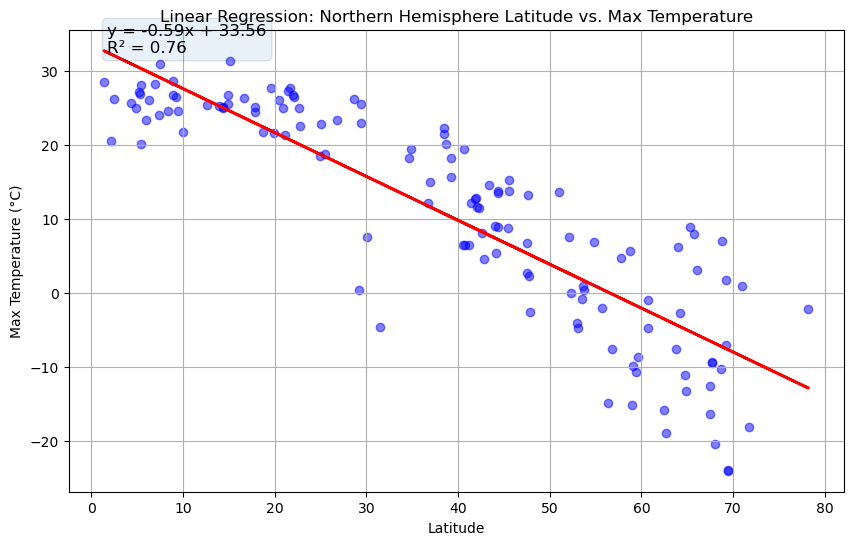

In [21]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'], 
    northern_hemi_df['Max Temp'], 
    'Latitude', 
    'Max Temperature (°C)', 
    'Linear Regression: Northern Hemisphere Latitude vs. Max Temperature', 
    'output_data/Linear_Regression_NH_Temp.png'
)

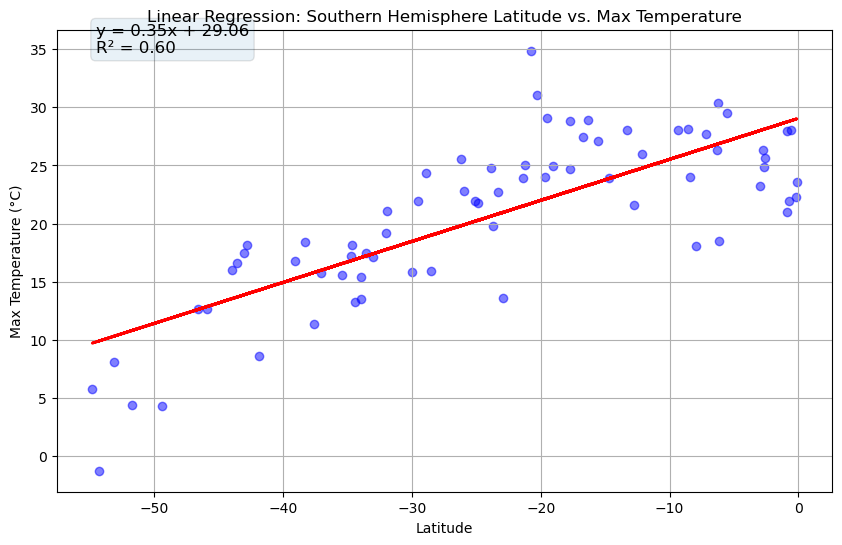

In [22]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'], 
    southern_hemi_df['Max Temp'], 
    'Latitude', 
    'Max Temperature (°C)', 
    'Linear Regression: Southern Hemisphere Latitude vs. Max Temperature', 
    'output_data/Linear_Regression_SH_Temp.png'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


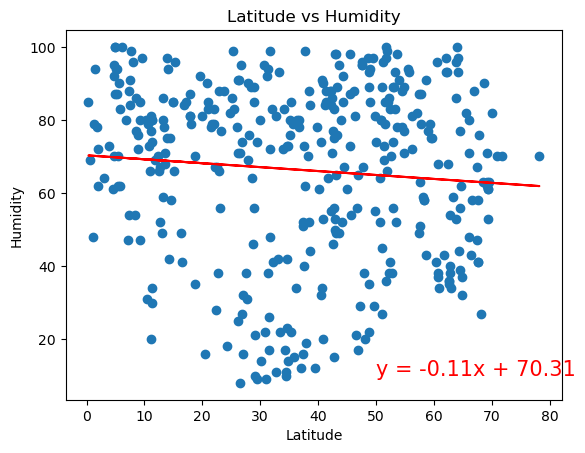

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


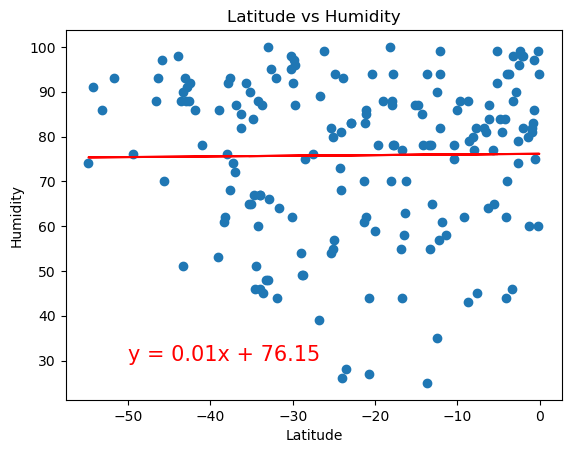

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


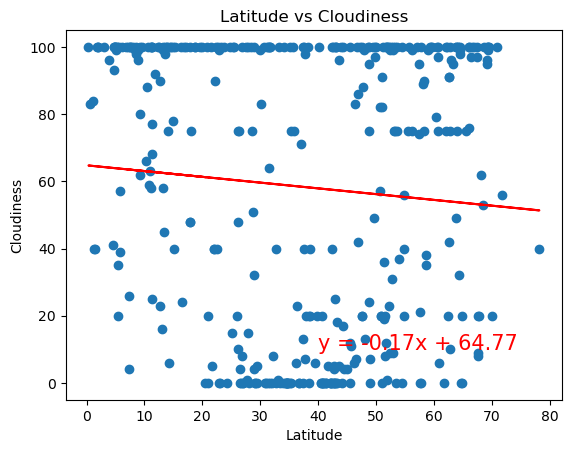

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


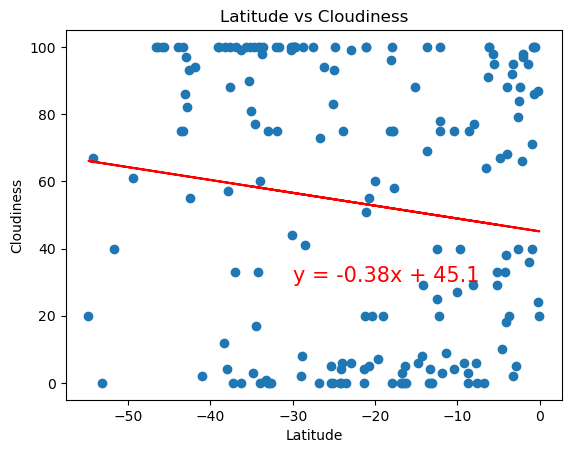

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


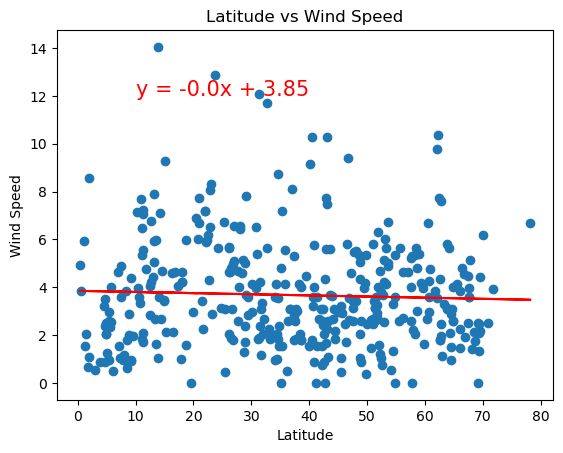

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


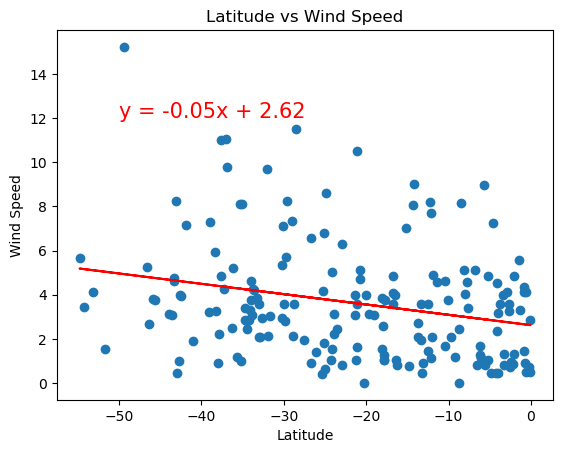

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE